In [1]:
import pandas as pd

In [5]:
filenames = ["t2.json", "t3.json", "t4.json", "t5.json"]

In [10]:
A = pd.DataFrame(columns = ['em_total_count', 'nem_total_count', 'neu_total_count',
       'neg_total_count', 'neg_em_count', 'total_count', 'neu_em_count',
       'neu_nem_count', 'pos_em_count', 'pos_total_count', 'pos_nem_count',
       'neg_nem_count', 'timestamp'])
for f in filenames:
    d = pd.DataFrame(pd.read_json(f).data[0])
    d = d.drop(["sources", "symbol", "asset_class", "location"], axis = 1)
    d.timestamp = pd.to_datetime(d.timestamp)
    A = pd.concat([A, d])
A = A.sort_values(by  = "timestamp")
A = A.set_index("timestamp")

In [11]:
A

,em_total_count,nem_total_count,neu_total_count,neg_total_count,neg_em_count,total_count,neu_em_count,neu_nem_count,pos_em_count,pos_total_count,pos_nem_count,neg_nem_count
timestamp,,,,,,,,,,,,
2022-11-23 00:00:00+00:00,12,59,11,13,1,71,1,10,10,47,37,12
2022-11-23 00:05:00+00:00,17,25,6,21,4,42,4,2,9,15,6,17
2022-11-23 00:10:00+00:00,7,33,9,6,2,40,0,9,5,25,20,4
2022-11-23 00:15:00+00:00,13,28,8,8,3,41,2,6,8,25,17,5
2022-11-23 00:20:00+00:00,8,29,3,11,1,37,1,2,6,23,17,10
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26 23:35:00+00:00,29,53,8,15,1,82,2,6,26,59,33,14
2022-11-26 23:40:00+00:00,19,46,5,16,1,65,3,2,15,44,29,15
2022-11-26 23:45:00+00:00,15,41,7,13,2,56,1,6,12,36,24,11


In [12]:
min(A.index), max(A.index)

(Timestamp('2022-11-23 00:00:00+0000', tz='UTC'),
 Timestamp('2022-11-26 23:55:00+0000', tz='UTC'))

<AxesSubplot:xlabel='timestamp'>

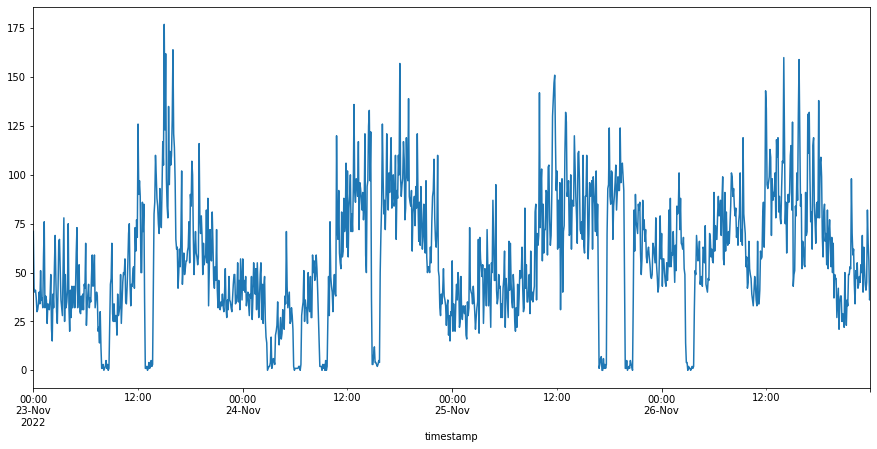

In [13]:
A.total_count.plot(figsize = (15, 7))

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<AxesSubplot:>

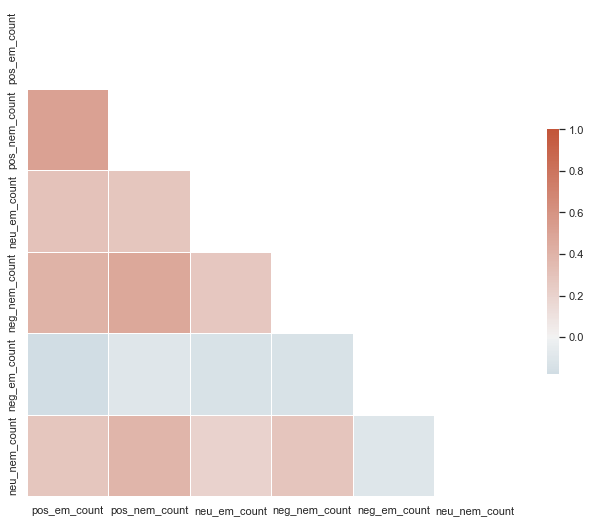

In [14]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

corr = d.drop(["total_count", "em_total_count", "nem_total_count", 
               "neu_total_count", "pos_total_count", "neg_total_count"], axis = 1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,  center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Emotional

In [15]:
emotional = ["pos_em_count", "neu_em_count", "neg_em_count"]
em = d[emotional]

<AxesSubplot:title={'center':'Emotional counts'}>

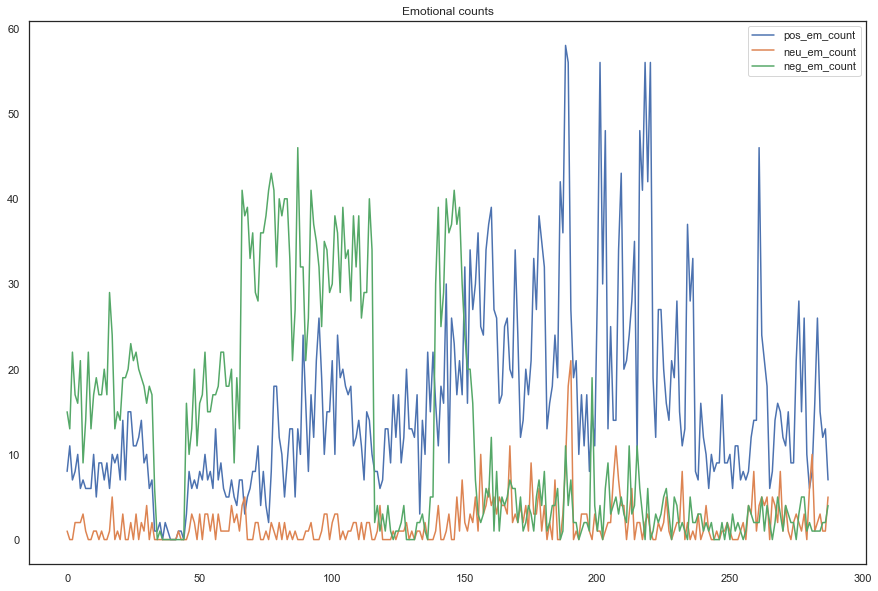

In [54]:
em.plot(figsize = (15, 10), title = "Emotional counts")

<AxesSubplot:title={'center':'Emotional counts smoothed'}>

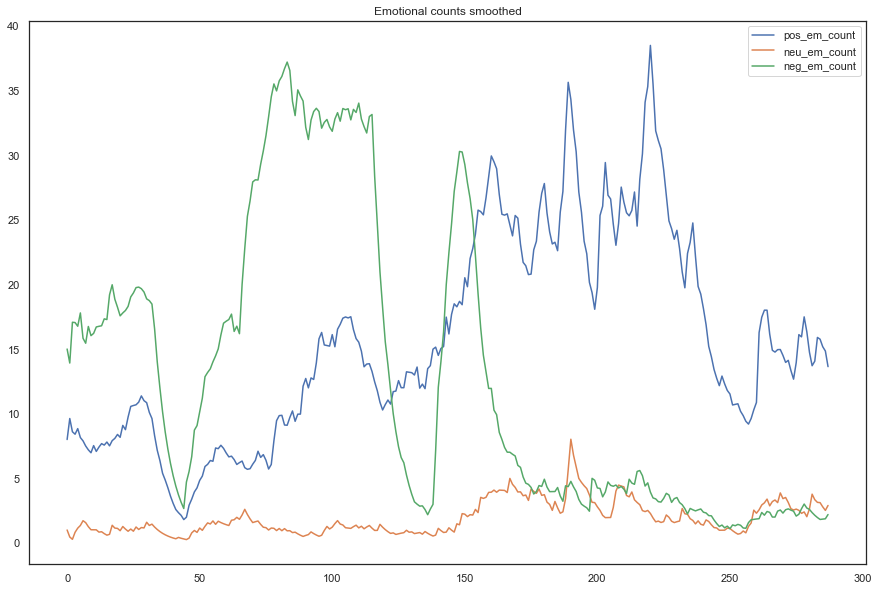

In [18]:
em.ewm(span = 12).mean().plot(figsize = (15, 10), title = "Emotional counts smoothed")

## Non-emotional

In [19]:
nonemotional = ["pos_nem_count", "neu_nem_count", "neg_nem_count"]
nem = d[nonemotional]

<AxesSubplot:title={'center':'Non-emotional counts'}>

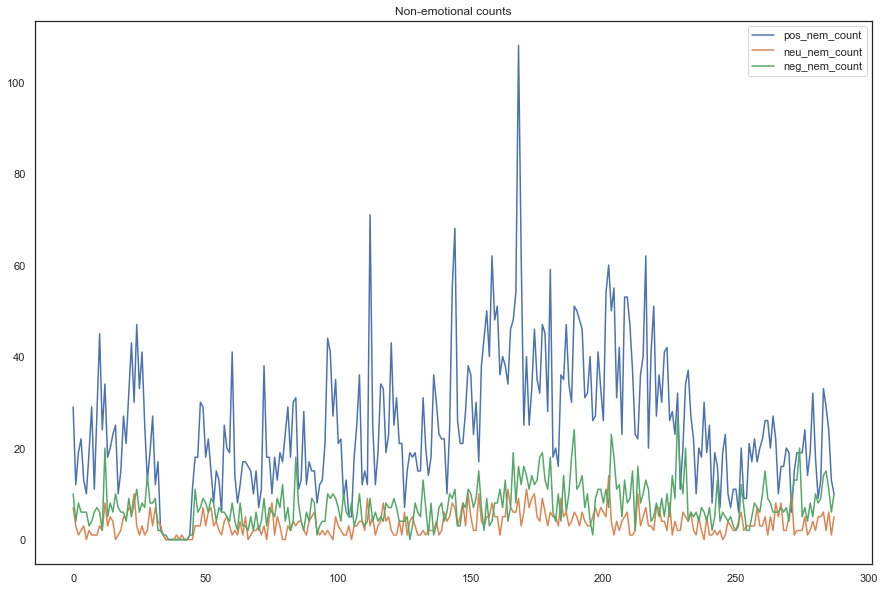

In [20]:
nem.plot(figsize = (15, 10), title = "Non-emotional counts")

<AxesSubplot:title={'center':'Non-emotional counts smoothed'}>

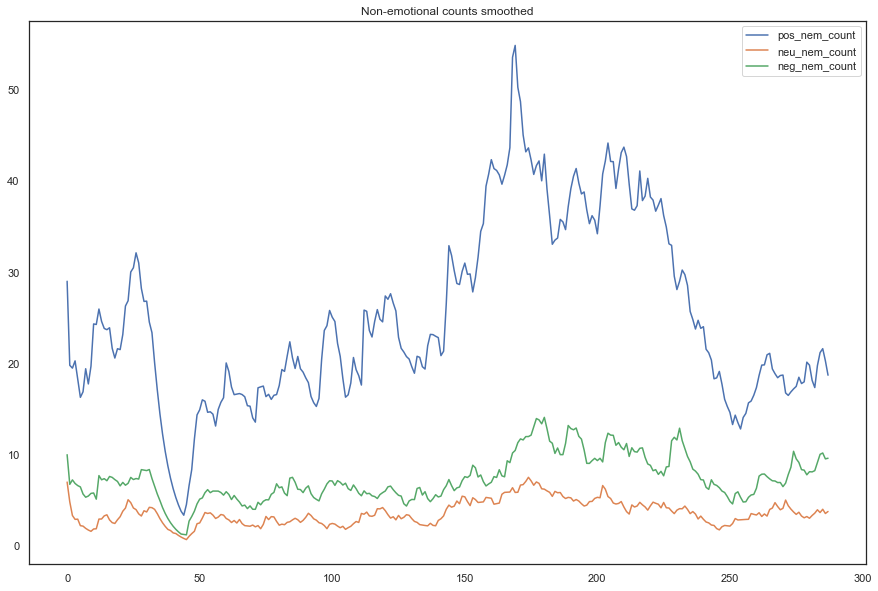

In [21]:
nem.ewm(span = 12).mean().plot(figsize = (15, 10), title = "Non-emotional counts smoothed")

In [22]:
from datetime import timezone

In [23]:
ethpath = "Binance_ETHUSDT_2022_minute.csv"
eth = pd.read_csv(ethpath, skiprows = 1, parse_dates=["date"])[['date',  'open', 'close', 'Volume USDT']][::-1]
eth["price"] = (eth.open + eth.close)/2
eth["timestamp"] = eth.date
eth = eth[["timestamp", "price", 'Volume USDT']]
eth['timestamp'] = eth['timestamp'].dt.tz_localize(timezone.utc)
eth = eth[eth.timestamp >= min(A.index)]
eth = eth[eth.timestamp < max(A.index)]
eth = eth.set_index("timestamp")

In [24]:
both = pd.merge(A, eth, left_index=True, right_index=True)

In [25]:
newdfdict = {}
for c in both.columns:
    if c == "price":
        newdfdict[c] = both[c].resample('H').mean() 
    else:
        newdfdict[c] = both[c].resample('H').sum() 
        
newdf = pd.DataFrame.from_dict(newdfdict)

In [26]:
colstoplot = [
    "price",
    "Volume USDT",
    "pos_em_count",
    "neg_em_count",
    "neu_em_count",
    "pos_nem_count",
    "neg_nem_count",
    "neu_nem_count",
    "total_count",
]
toplot = newdf[colstoplot].copy()

In [27]:
toplot["pos"] = toplot.pos_em_count + toplot.pos_nem_count
toplot["neg"] = toplot.neg_em_count + toplot.neg_nem_count
toplot["neu"] = toplot.neu_em_count + toplot.neu_nem_count

In [28]:
toplot

,price,Volume USDT,pos_em_count,neg_em_count,neu_em_count,pos_nem_count,neg_nem_count,neu_nem_count,total_count,pos,neg,neu
timestamp,,,,,,,,,,,,
2022-11-23 00:00:00+00:00,1137.230833,6.777805e+06,97,22,20,213,96,39,487,310,118,59
2022-11-23 01:00:00+00:00,1131.063750,3.471784e+06,103,25,12,213,82,33,468,316,107,45
2022-11-23 02:00:00+00:00,1148.934167,1.292504e+07,110,18,14,233,90,22,487,343,108,36
2022-11-23 03:00:00+00:00,1162.957083,9.343984e+06,161,22,10,249,63,24,529,410,85,34
2022-11-23 04:00:00+00:00,1165.023750,5.244710e+06,144,16,18,191,81,34,484,335,97,52
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26 19:00:00+00:00,1207.139167,2.680010e+06,236,28,19,280,113,40,716,516,141,59
2022-11-26 20:00:00+00:00,1208.161667,1.602556e+06,115,13,12,162,59,23,384,277,72,35
2022-11-26 21:00:00+00:00,1210.014583,2.072094e+06,183,24,32,229,91,44,603,412,115,76


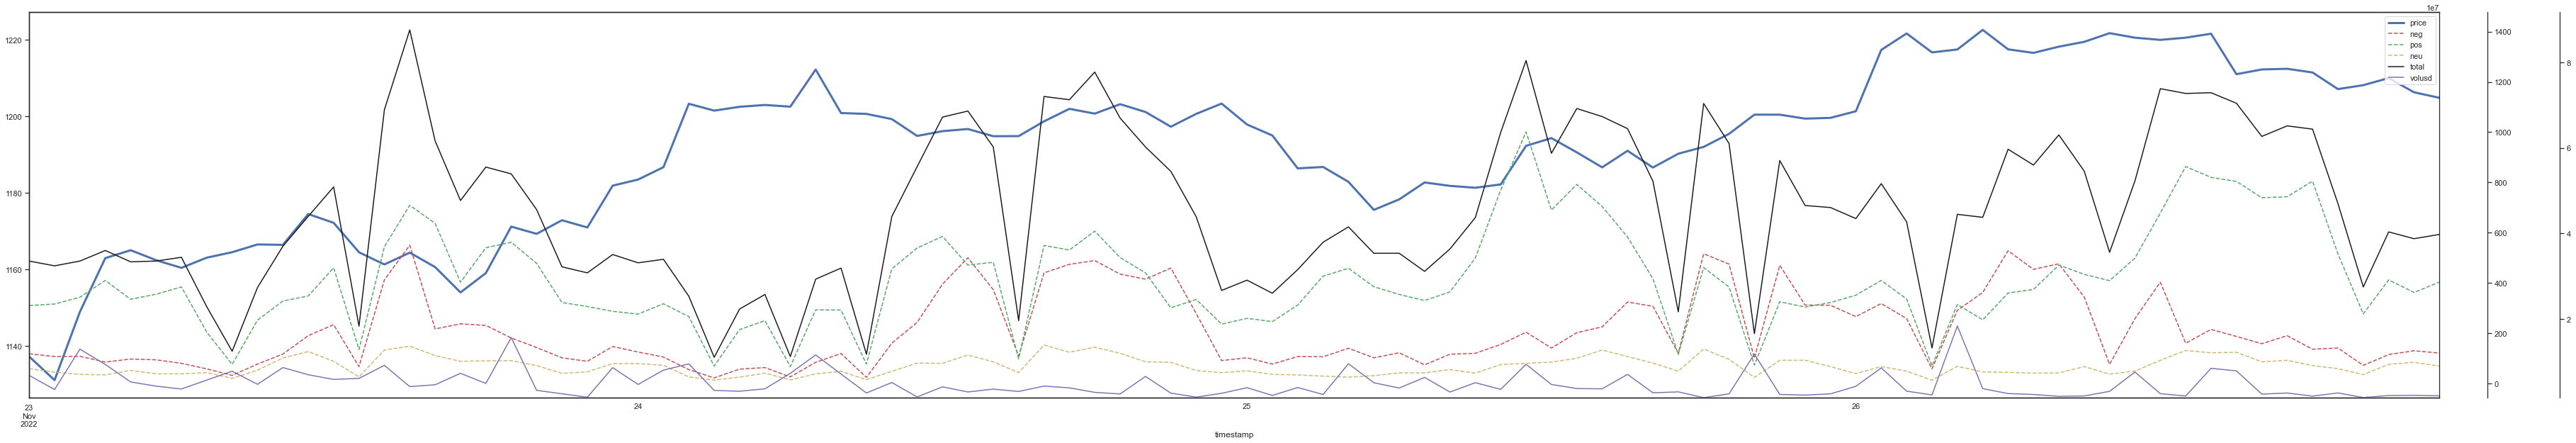

In [301]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
fig, ax = plt.subplots()
ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.02))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax4 = ax.twinx()
rspine = ax4.spines['right']
rspine.set_position(('axes', 1.05))
ax4.set_frame_on(True)
ax4.patch.set_visible(False)
fig.subplots_adjust(right=0.8)

toplot.price.plot(ax=ax, style='b-', figsize = (70, 10), lw = 3)#figsize = (70, 10))
toplot.neg.plot(ax=ax3, style='r--')
toplot.pos.plot(ax=ax3, style='g--')
toplot.neu.plot(ax=ax3, style='y--')
toplot.total_count.plot(ax=ax3, style='k-')
toplot["Volume USDT"].plot(ax=ax4, style='m-')
ax4.set_ylim(min(toplot["Volume USDT"]),max(toplot["Volume USDT"])*5)

ax3.legend(
    [ax.get_lines()[0], 
     ax3.get_lines()[0],
     ax3.get_lines()[1],
     ax3.get_lines()[2],
     ax3.get_lines()[3],
     ax4.get_lines()[0]
    ],
    ['price','neg','pos','neu','total',"volusd"])
ax3.figure.savefig("summedsentiment.png", dpi = 200)

## Granger causality

In [223]:
temp = dnorm[['total_count', 'price']]
gc_res = grangercausalitytests(temp, 38)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1110  , p=0.7396  , df_denom=115, df_num=1
ssr based chi2 test:   chi2=0.1139  , p=0.7358  , df=1
likelihood ratio test: chi2=0.1138  , p=0.7358  , df=1
parameter F test:         F=0.1110  , p=0.7396  , df_denom=115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4060  , p=0.6673  , df_denom=112, df_num=2
ssr based chi2 test:   chi2=0.8482  , p=0.6544  , df=2
likelihood ratio test: chi2=0.8452  , p=0.6554  , df=2
parameter F test:         F=0.4060  , p=0.6673  , df_denom=112, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3324  , p=0.8020  , df_denom=109, df_num=3
ssr based chi2 test:   chi2=1.0611  , p=0.7865  , df=3
likelihood ratio test: chi2=1.0563  , p=0.7876  , df=3
parameter F test:         F=0.3324  , p=0.8020  , df_denom=109, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3000  , p=0.8773  

In [239]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in tqdm(df.columns):
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [234]:
from tqdm import tqdm

In [241]:
maxlag = 38
test   = 'ssr_chi2test'
grangers_causation_matrix(dnorm, dnorm.columns)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:26<00:00,  1.92s/it]


,neg_em_count_x,neu_total_count_x,neu_em_count_x,nem_total_count_x,pos_nem_count_x,em_total_count_x,neu_nem_count_x,neg_total_count_x,total_count_x,pos_total_count_x,neg_nem_count_x,pos_em_count_x,price_x,Volume USDT_x
neg_em_count_y,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neu_total_count_y,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neu_em_count_y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nem_total_count_y,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pos_nem_count_y,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
em_total_count_y,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neu_nem_count_y,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
neg_total_count_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
total_count_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
pos_total_count_y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
